In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

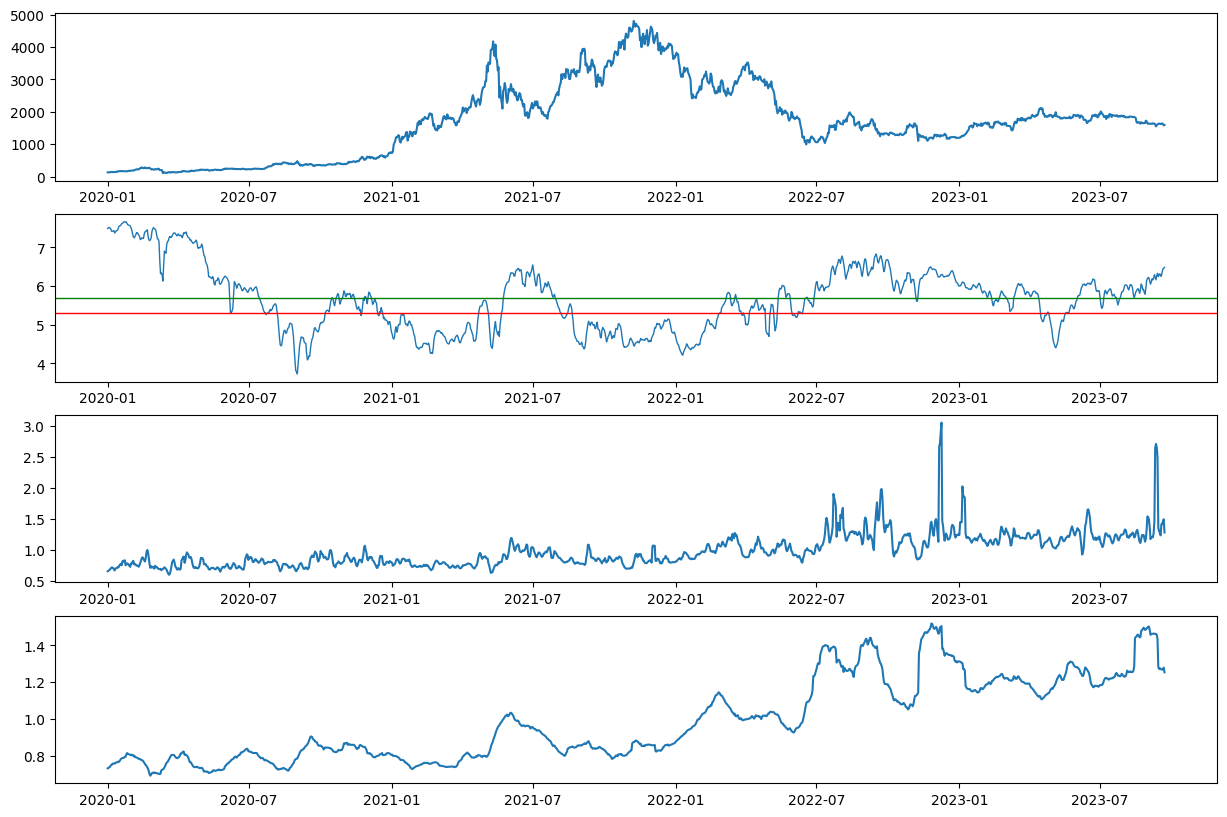

In [9]:
df = pd.read_csv('merged.csv', parse_dates=["date"], index_col="date")

df['TXFEE'] = df['transactions_count_total'] / df['fees_total']
df['TXFEE_LOG'] = np.log(df['TXFEE'])
df['TXFEE_LOG_5MA'] = df['TXFEE_LOG'].rolling(window=5).mean()

df['RS'] = df['addresses_count_sender'] / df['addresses_count_receiver']
df['RS_4MA'] = df['RS'].rolling(window=4).mean()
df['RS_30MA'] = df['RS'].rolling(window=30).mean()

# Drop the first 30 row(30ma)
df = df.iloc[30:]

fig, ax = plt.subplots(4, 1, figsize=(15, 10))

ax[0].plot(df.index, df['close'])

ax[1].plot(df.index, df['TXFEE_LOG_5MA'], linewidth=1)
ax[1].axhline(y = 5.7, color = 'g', linestyle = '-', linewidth=1)
ax[1].axhline(y = 5.3, color = 'r', linestyle = '-', linewidth=1)


ax[2].plot(df['RS_4MA'])
ax[3].plot(df['RS_30MA'])


In [10]:

from IPython.core.display import HTML

HTML('''
<script>
  function code_toggle() {
    setTimeout(function() {
      var cells = document.querySelectorAll('div.jp-Cell-inputWrapper');
      for (var i = 0; i < cells.length; i++) {
        cells[i].style.display = "none";
      }
      
      var tabs = document.querySelectorAll('lm-DockPanel-tabBar');
      for (var i = 0; i < tabs.length; i++) {
        tabs[i].style.display = "none";
      }
      
      var navElements = document.querySelectorAll('[role="navigation"]');
      for (var i = 0; i < navElements.length; i++) {
        navElements[i].style.display = "none";
      }
      
      var element = document.getElementById('jp-top-panel');
      if (element) {
        element.style.display = "none";
      }
      
      var complementaryElements = document.querySelectorAll('[role="complementary"]');
      for (var i = 0; i < complementaryElements.length; i++) {
        complementaryElements[i].style.display = "none";
      }
      
      var regionElements = document.querySelectorAll('[role="region"]');
      regionElements.forEach(function(element) {
        element.style.overflow = "hidden";
      });
      
      var leftStack = document.getElementById('jp-left-stack');
      if (leftStack) {
        leftStack.style.display = "none";
      }
    }, 0);
  }
  code_toggle();
</script>
''')